<a href="https://colab.research.google.com/github/Jinal2002/Pylib/blob/main/CO2_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv("/content/drive/MyDrive/data/FuelConsumptionCo2.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
df.select_dtypes(exclude=["object"])

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4,9.9,6.7,8.5,33,196
1,2014,2.4,4,11.2,7.7,9.6,29,221
2,2014,1.5,4,6.0,5.8,5.9,48,136
3,2014,3.5,6,12.7,9.1,11.1,25,255
4,2014,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6,13.4,9.8,11.8,24,271
1063,2014,3.2,6,13.2,9.5,11.5,25,264
1064,2014,3.0,6,13.4,9.8,11.8,24,271
1065,2014,3.2,6,12.9,9.3,11.3,25,260


In [6]:
df_num = df.select_dtypes(['int','float'])
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


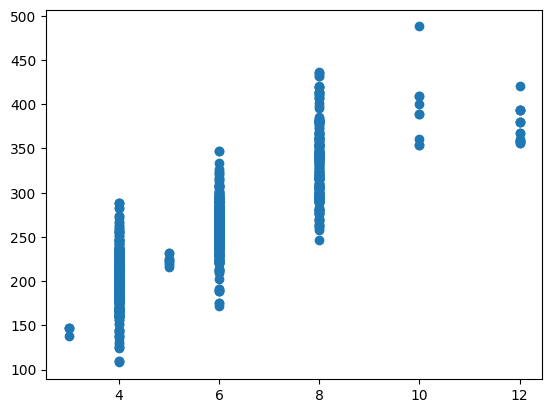

In [7]:
plt.scatter(df_num['CYLINDERS'],df_num['CO2EMISSIONS'])

In [8]:
cdf = df[['ENGINESIZE' , 'CYLINDERS' ,'FUELCONSUMPTION_CITY' , 'FUELCONSUMPTION_HWY' , 'FUELCONSUMPTION_COMB' , 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


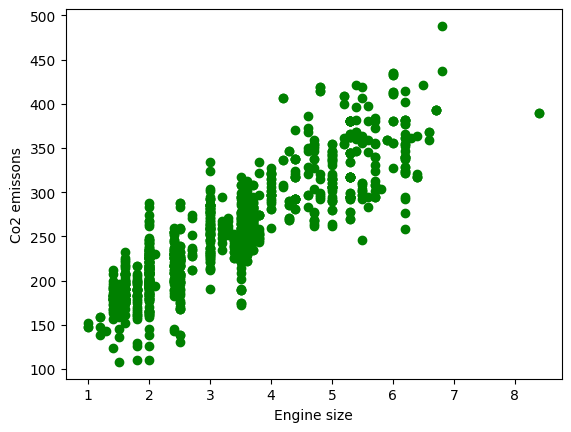

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='green')
plt.xlabel('Engine size')
plt.ylabel('Co2 emissons')
plt.show()

In [10]:
msk = np.random.rand(len(df))<8
train = cdf[msk]
test = cdf[~msk]

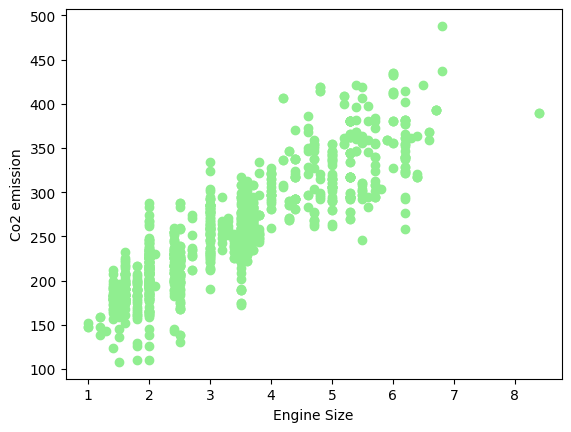

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='lightgreen')
plt.xlabel('Engine Size')
plt.ylabel('Co2 emission')
plt.show()

In [ ]:
# Multiple Regression Model
# When more than one independent variable is present, the process is called multiple linear regression.
# Ex: predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars.

In [12]:
from sklearn import linear_model
reg =linear_model.LinearRegression()
a = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
b = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit (a,b)
print("Coefficient: ", reg.coef_)             #the coefficient

Coefficient:  [[10.85524041  7.51622501  9.59563161]]


In [ ]:
# Scikit-learn uses plain Ordinary Least Squares (OLS) method to solve this problem.
# In multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane,
# sklearn can estimate them from our data. OLS tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between
# the target variable (y) and our predicted output ( 𝑦̂ ) over all samples in the dataset.

<!-- from sklearn.metrics import r2_score
CYLINDER = 10
b_hat = reg.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
a = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
b = np.asanyarray(trai[['CO2EMISSIONS']])

print("Mean absolute error: %.2f" % np.mean(np.absolute(b_hat - b)))
print("Residual sum square (MSE): %.2f" % np.mean((b_hat - b) ** 2))
print("R2-score: %2.f" % r2_score(b_hat , b)) -->

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming you have your data loaded into pandas DataFrames named 'train' and 'test'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']], train[['CO2EMISSIONS']], test_size=0.2, random_state=42)

# Train the model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the testing set
b_hat = reg.predict(X_test)

# Evaluate the model
print("Mean absolute error: %.2f" % np.mean(np.absolute(b_hat - y_test)))
print("Residual sum square (MSE): %.2f" % np.mean((b_hat - y_test) ** 2))
print("R2-score: %2.f" % r2_score(y_test, b_hat))


Mean absolute error: 16.72
Residual sum square (MSE): 512.86
R2-score:  1


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
